In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━

In [17]:
!pip install git+https://github.com/pycaret/pycaret.git@master

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-cbhgs5il
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-cbhgs5il
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 25.7 MB/s eta 0:00:00
  Created wheel for pycaret: filename=pycaret-3.4.0-py3-none-any.whl size=491177 sha256=a0867faba06780aee1f696409bc2e3f0f0d3953283fcf423a02556641290b822
  Stored in directory: /tm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import shap

In [2]:
df = pd.read_csv('Ionic_conductivity_training_dataset.csv')
df

,Formula,Type,Crystal system,Ionic conductivity (S/cm),Reference,Spacegroup,Unnamed: 6,Reference index,Source,composition,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,NaZr2(PO4)3,NASICON,Trigonal,4.500000e-06,"1,2,3",167.0,NaN,1.0,10.1038/s41467-021-26006-3,Na1 Zr2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.121437,0.364583,0.593750,0.041667,0.000000
1,NaGe2(PO4)3,NASICON,Trigonal,1.100000e-12,"1,2,3",148.0,NaN,2.0,10.1088/2399-6528/ab92d8,Na1 Ge2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.099691,0.301724,0.525862,0.172414,0.000000
2,NaTi2(PO4)3,NASICON,Trigonal,4.430000e-10,"1,2,3",167.0,NaN,3.0,10.1016/j.jpowsour.2014.09.137,Na1 Ti2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.114771,0.364583,0.593750,0.041667,0.000000
3,NaHf2(PO4)3,NASICON,Trigonal,8.770000e-10,"1,2,3",167.0,NaN,4.0,10.1016/0167-2738(93)90179-7,Na1 Hf2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.122367,0.282258,0.459677,0.032258,0.225806
4,NaSn2(PO4)3,NASICON,Trigonal,4.650000e-09,"1,2,3",148.0,NaN,5.0,10.1016/0025-5408(92)90148-S,Na1 Sn2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.101249,0.301724,0.525862,0.172414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Li2MgCl4,Li-halide,Monoclinic,2.400000e-04,123,NaN,NaN,NaN,NaN,Li2 Mg1 Cl4,...,0.575065,0.572069,0.571484,True,0.695200,0.161536,0.375000,0.625000,0.000000,0.000000
324,Li2MgBr4,Li-halide,Monoclinic,1.930000e-04,123,NaN,NaN,NaN,NaN,Li2 Mg1 Br4,...,0.575065,0.572069,0.571484,True,0.624726,0.143394,0.166667,0.277778,0.555556,0.000000
325,Li3AlCl6,Li-halide,Monoclinic,5.300000e-05,123,NaN,NaN,NaN,NaN,Li3 Al1 Cl6,...,0.603719,0.600668,0.600059,True,0.695200,0.155062,0.354167,0.645833,0.000000,0.000000
326,Li6MgCl8,Li-halide,Monoclinic,4.300000e-05,123,NaN,NaN,NaN,NaN,Li6 Mg1 Cl8,...,0.556540,0.542966,0.536263,True,0.695200,0.169469,0.375000,0.625000,0.000000,0.000000


In [3]:
df['Ionic conductivity (S/cm)'] = (df['Ionic conductivity (S/cm)'] >= 1e-4).astype(int)
df

,Formula,Type,Crystal system,Ionic conductivity (S/cm),Reference,Spacegroup,Unnamed: 6,Reference index,Source,composition,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,NaZr2(PO4)3,NASICON,Trigonal,0,"1,2,3",167.0,NaN,1.0,10.1038/s41467-021-26006-3,Na1 Zr2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.121437,0.364583,0.593750,0.041667,0.000000
1,NaGe2(PO4)3,NASICON,Trigonal,0,"1,2,3",148.0,NaN,2.0,10.1088/2399-6528/ab92d8,Na1 Ge2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.099691,0.301724,0.525862,0.172414,0.000000
2,NaTi2(PO4)3,NASICON,Trigonal,0,"1,2,3",167.0,NaN,3.0,10.1016/j.jpowsour.2014.09.137,Na1 Ti2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.114771,0.364583,0.593750,0.041667,0.000000
3,NaHf2(PO4)3,NASICON,Trigonal,0,"1,2,3",167.0,NaN,4.0,10.1016/0167-2738(93)90179-7,Na1 Hf2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.122367,0.282258,0.459677,0.032258,0.225806
4,NaSn2(PO4)3,NASICON,Trigonal,0,"1,2,3",148.0,NaN,5.0,10.1016/0025-5408(92)90148-S,Na1 Sn2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.101249,0.301724,0.525862,0.172414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Li2MgCl4,Li-halide,Monoclinic,1,123,NaN,NaN,NaN,NaN,Li2 Mg1 Cl4,...,0.575065,0.572069,0.571484,True,0.695200,0.161536,0.375000,0.625000,0.000000,0.000000
324,Li2MgBr4,Li-halide,Monoclinic,1,123,NaN,NaN,NaN,NaN,Li2 Mg1 Br4,...,0.575065,0.572069,0.571484,True,0.624726,0.143394,0.166667,0.277778,0.555556,0.000000
325,Li3AlCl6,Li-halide,Monoclinic,0,123,NaN,NaN,NaN,NaN,Li3 Al1 Cl6,...,0.603719,0.600668,0.600059,True,0.695200,0.155062,0.354167,0.645833,0.000000,0.000000
326,Li6MgCl8,Li-halide,Monoclinic,0,123,NaN,NaN,NaN,NaN,Li6 Mg1 Cl8,...,0.556540,0.542966,0.536263,True,0.695200,0.169469,0.375000,0.625000,0.000000,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Columns: 155 entries, Formula to frac f valence electrons
dtypes: bool(1), float64(146), int64(2), object(6)
memory usage: 395.1+ KB


In [5]:
print("There are {} columns of names listed below:\n\n{}".format(df.shape[1], df.columns.values))

There are 155 columns of names listed below:

['Formula' 'Type' 'Crystal system' 'Ionic conductivity (S/cm)' 'Reference'
 'Spacegroup' 'Unnamed: 6' 'Reference index' 'Source' 'composition'
 'MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'


In [6]:
df['Ionic conductivity (S/cm)'].value_counts()

,count
Ionic conductivity (S/cm),
1,191
0,137


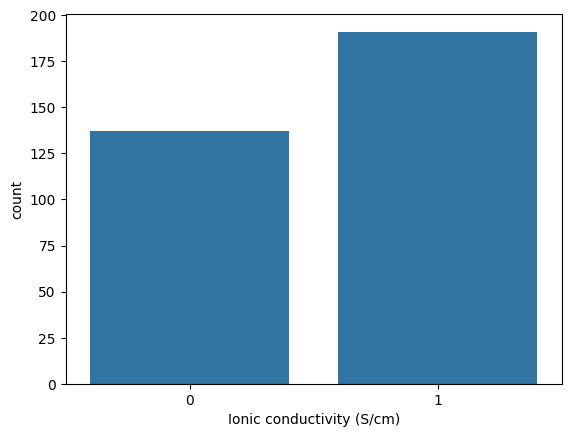

In [7]:
import seaborn as sb
sb.countplot(x ='Ionic conductivity (S/cm)', data = df)
plt.grid(False)
plt.show()

In [8]:
len(df)

328

In [9]:
df['Ionic conductivity (S/cm)'].value_counts() / len(df)

,count
Ionic conductivity (S/cm),
1,0.582317
0,0.417683


In [10]:
df = df.drop(['Formula',
                  'Type',
                  'Crystal system',
                  'Reference',
                  'Spacegroup',
                  'Unnamed: 6',
                  'Reference index',
                  'Source',
                  'composition'], axis = 1)
df

,Ionic conductivity (S/cm),MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,0,8.0,40.0,32.0,12.888889,6.728395,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,True,0.792998,0.121437,0.364583,0.593750,0.041667,0.000000
1,0,8.0,32.0,24.0,12.000000,5.444444,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,True,0.792998,0.099691,0.301724,0.525862,0.172414,0.000000
2,0,8.0,22.0,14.0,10.888889,3.851852,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,True,0.792998,0.114771,0.364583,0.593750,0.041667,0.000000
3,0,8.0,72.0,64.0,16.444444,12.345679,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,True,0.792998,0.122367,0.282258,0.459677,0.032258,0.225806
4,0,8.0,50.0,42.0,14.000000,8.333333,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,True,0.792998,0.101249,0.301724,0.525862,0.172414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,3.0,17.0,14.0,12.285714,5.387755,17.0,1.0,94.0,93.0,...,0.575065,0.572069,0.571484,True,0.695200,0.161536,0.375000,0.625000,0.000000,0.000000
324,1,3.0,35.0,32.0,22.571429,14.204082,35.0,1.0,95.0,94.0,...,0.575065,0.572069,0.571484,True,0.624726,0.143394,0.166667,0.277778,0.555556,0.000000
325,0,3.0,17.0,14.0,12.400000,5.640000,17.0,1.0,94.0,93.0,...,0.603719,0.600668,0.600059,True,0.695200,0.155062,0.354167,0.645833,0.000000,0.000000
326,0,3.0,17.0,14.0,11.066667,6.453333,17.0,1.0,94.0,93.0,...,0.556540,0.542966,0.536263,True,0.695200,0.169469,0.375000,0.625000,0.000000,0.000000


In [11]:
X = df.drop(['Ionic conductivity (S/cm)'], axis=1)
X

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,8.0,40.0,32.0,12.888889,6.728395,8.0,2.0,87.0,85.0,76.833333,...,0.666814,0.666673,0.666667,True,0.792998,0.121437,0.364583,0.593750,0.041667,0.000000
1,8.0,32.0,24.0,12.000000,5.444444,8.0,2.0,87.0,85.0,80.722222,...,0.666814,0.666673,0.666667,True,0.792998,0.099691,0.301724,0.525862,0.172414,0.000000
2,8.0,22.0,14.0,10.888889,3.851852,8.0,2.0,87.0,85.0,76.722222,...,0.666814,0.666673,0.666667,True,0.792998,0.114771,0.364583,0.593750,0.041667,0.000000
3,8.0,72.0,64.0,16.444444,12.345679,8.0,2.0,87.0,85.0,76.944444,...,0.666814,0.666673,0.666667,True,0.792998,0.122367,0.282258,0.459677,0.032258,0.225806
4,8.0,50.0,42.0,14.000000,8.333333,8.0,2.0,87.0,85.0,80.833333,...,0.666814,0.666673,0.666667,True,0.792998,0.101249,0.301724,0.525862,0.172414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,3.0,17.0,14.0,12.285714,5.387755,17.0,1.0,94.0,93.0,63.714286,...,0.575065,0.572069,0.571484,True,0.695200,0.161536,0.375000,0.625000,0.000000,0.000000
324,3.0,35.0,32.0,22.571429,14.204082,35.0,1.0,95.0,94.0,64.285714,...,0.575065,0.572069,0.571484,True,0.624726,0.143394,0.166667,0.277778,0.555556,0.000000
325,3.0,17.0,14.0,12.400000,5.640000,17.0,1.0,94.0,93.0,64.000000,...,0.603719,0.600668,0.600059,True,0.695200,0.155062,0.354167,0.645833,0.000000,0.000000
326,3.0,17.0,14.0,11.066667,6.453333,17.0,1.0,94.0,93.0,55.066667,...,0.556540,0.542966,0.536263,True,0.695200,0.169469,0.375000,0.625000,0.000000,0.000000


In [12]:
X.columns

Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber',
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       '5-norm', '7-norm', '10-norm', 'compound possible', 'max ionic char',
       'avg ionic char', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons'],
      dtype='object', length=145)

In [13]:
y = df['Ionic conductivity (S/cm)']
y

,Ionic conductivity (S/cm)
0,0
1,0
2,0
3,0
4,0
...,...
323,1
324,1
325,0
326,0


In [14]:
df['compound possible'] = (df['compound possible'] == True).astype(int)
df

,Ionic conductivity (S/cm),MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,0,8.0,40.0,32.0,12.888889,6.728395,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.121437,0.364583,0.593750,0.041667,0.000000
1,0,8.0,32.0,24.0,12.000000,5.444444,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.099691,0.301724,0.525862,0.172414,0.000000
2,0,8.0,22.0,14.0,10.888889,3.851852,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.114771,0.364583,0.593750,0.041667,0.000000
3,0,8.0,72.0,64.0,16.444444,12.345679,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.122367,0.282258,0.459677,0.032258,0.225806
4,0,8.0,50.0,42.0,14.000000,8.333333,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.101249,0.301724,0.525862,0.172414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,3.0,17.0,14.0,12.285714,5.387755,17.0,1.0,94.0,93.0,...,0.575065,0.572069,0.571484,1,0.695200,0.161536,0.375000,0.625000,0.000000,0.000000
324,1,3.0,35.0,32.0,22.571429,14.204082,35.0,1.0,95.0,94.0,...,0.575065,0.572069,0.571484,1,0.624726,0.143394,0.166667,0.277778,0.555556,0.000000
325,0,3.0,17.0,14.0,12.400000,5.640000,17.0,1.0,94.0,93.0,...,0.603719,0.600668,0.600059,1,0.695200,0.155062,0.354167,0.645833,0.000000,0.000000
326,0,3.0,17.0,14.0,11.066667,6.453333,17.0,1.0,94.0,93.0,...,0.556540,0.542966,0.536263,1,0.695200,0.169469,0.375000,0.625000,0.000000,0.000000


In [15]:
df['compound possible'].value_counts()

,count
compound possible,
1,259
0,69


In [16]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'Ionic conductivity (S/cm)', train_size = 0.8, normalize = True, session_id = 0)

,Description,Value
0,Session id,0
1,Target,Ionic conductivity (S/cm)
2,Target type,Binary
3,Original data shape,"(328, 146)"
4,Transformed data shape,"(328, 146)"
5,Transformed train set shape,"(262, 146)"
6,Transformed test set shape,"(66, 146)"
7,Numeric features,145
8,Preprocess,True
9,Imputation type,simple


In [17]:
et_model = load_model('et_model_pipeline')
et_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['MagpieData minimum Number',
                                             'MagpieData maximum Number',
                                             'MagpieData range Number',
                                             'MagpieData mean Number',
                                             'MagpieData avg_dev Number',
                                             'MagpieData mode Number',
                                             'MagpieData minimum '
                                             'MendeleevNumber',
                                             'MagpieData maximum '
                                             'MendeleevNumber',
                                             'MagpieDat...
                 ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                      class_weight='balanced_subsample',
                                      criterion='entropy', max_depth=10,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.001,
                                      min_samples_leaf=3, min_samples_split=7,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=150,
                                      n_jobs=-1, oob_score=False,
                                      random_state=0, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [18]:
et_model = et_model[-1]
et_model

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=10, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, monotonic_cst=None,
                     n_estimators=150, n_jobs=-1, oob_score=False,
                     random_state=0, verbose=0, warm_start=False)

In [19]:
another_new_scaler = StandardScaler().fit(X)
X_scaled = another_new_scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,1.209641,-0.506496,-0.661886,-0.358360,-0.584383,-0.121588,1.203229,-0.416268,-0.602605,1.383456,...,1.448241,1.395451,1.361375,0.516148,0.393218,-1.137071,-0.007576,1.166850,-0.616974,-0.435799
1,1.209641,-0.973811,-1.116424,-0.649506,-0.868040,-0.121588,1.203229,-0.416268,-0.602605,1.774264,...,1.448241,1.395451,1.361375,0.516148,0.393218,-1.969555,-1.355494,0.146853,1.213816,-0.435799
2,1.209641,-1.557955,-1.684596,-1.013439,-1.219885,-0.121588,1.203229,-0.416268,-0.602605,1.372290,...,1.448241,1.395451,1.361375,0.516148,0.393218,-1.392283,-0.007576,1.166850,-0.616974,-0.435799
3,1.209641,1.362765,1.156265,0.806224,0.656621,-0.121588,1.203229,-0.416268,-0.602605,1.394622,...,1.448241,1.395451,1.361375,0.516148,0.393218,-1.101473,-1.772913,-0.847552,-0.748718,2.524044
4,1.209641,0.077648,-0.093714,0.005572,-0.229810,-0.121588,1.203229,-0.416268,-0.602605,1.785430,...,1.448241,1.395451,1.361375,0.516148,0.393218,-1.909926,-1.355494,0.146853,1.213816,-0.435799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.820872,-1.850027,-1.684596,-0.555924,-0.880565,2.303592,-0.831097,2.330144,2.314803,0.065078,...,-0.140897,-0.124280,-0.099314,0.516148,-0.865960,0.397966,0.215793,1.636372,-1.200412,-0.435799
324,-0.820872,-0.798568,-0.661886,2.813052,1.067190,7.153950,-0.831097,2.722488,2.679479,0.122503,...,-0.140897,-0.124280,-0.099314,0.516148,-1.773334,-0.296516,-4.251591,-3.580542,6.578767,-0.435799
325,-0.820872,-1.850027,-1.684596,-0.518490,-0.824837,2.303592,-0.831097,2.330144,2.314803,0.093790,...,0.355402,0.335133,0.339191,0.516148,-0.865960,0.150132,-0.230946,1.949387,-1.200412,-0.435799
326,-0.820872,-1.850027,-1.684596,-0.955210,-0.645151,2.303592,-0.831097,2.330144,2.314803,-0.803951,...,-0.461762,-0.591803,-0.639826,0.516148,-0.865960,0.701685,0.215793,1.636372,-1.200412,-0.435799


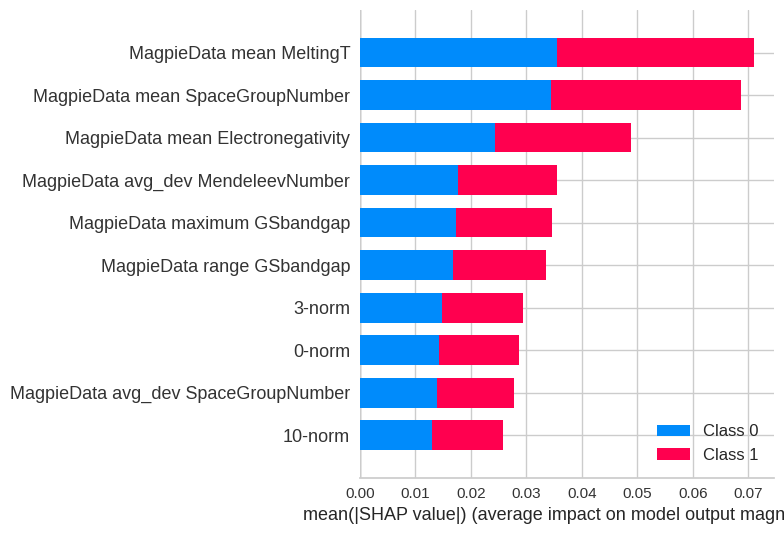

In [20]:
et_model_shap = et_model.fit(X_scaled,y)
shap_values_et = shap.Explainer(et_model_shap).shap_values(X_scaled)
shap.summary_plot(shap_values_et, X_scaled, max_display=10)